In [1]:
import numpy as np
import matplotlib.pyplot as plt
from localization import datasets, models, samplers
from localization.utils import build_DRT, iterate_kron, build_gaussian_covariance
import jax
import jax.numpy as jnp
from jax.scipy.special import erf as gain_function

### Dataset

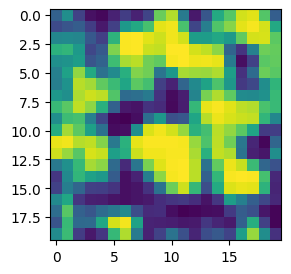

In [2]:
config = dict(
    num_dimensions=20,
    xi1=5,
    xi2=2,
    g=100,
    dim=2,
    seed=0,
    key=jax.random.PRNGKey(0),
)
dataset = datasets.NonlinearGPDataset(**config)
x, y = dataset[:10]
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.imshow(x[0].reshape(20, 20))

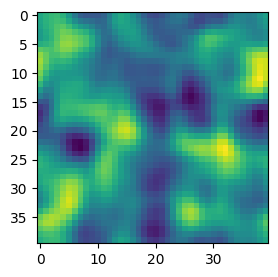

In [5]:
dataset = datasets.NLGPGaussianCloneDataset(**config)
x, y = dataset[:10]
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.imshow(x[0].reshape(20, 20))

### Eigenvector visualization

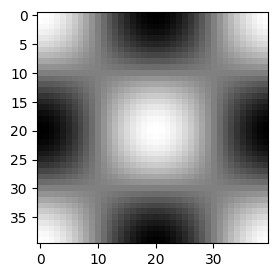

In [39]:
Sigma = iterate_kron(build_gaussian_covariance(40, 5), 2)
DRT1 = build_DRT(40)
DRT = iterate_kron(DRT1, 2)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.imshow(DRT[:,41].reshape(40, 40), cmap="gray")

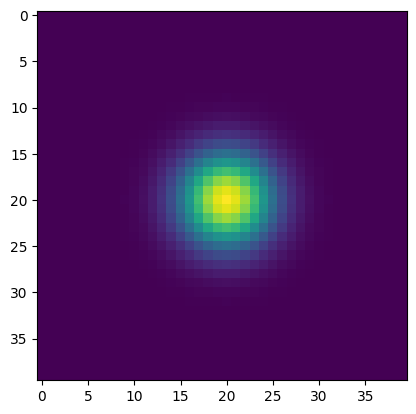

In [56]:
_ = plt.imshow(Sigma[820].reshape(40, 40))

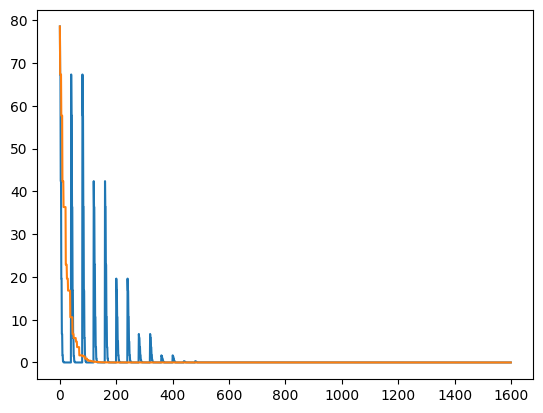

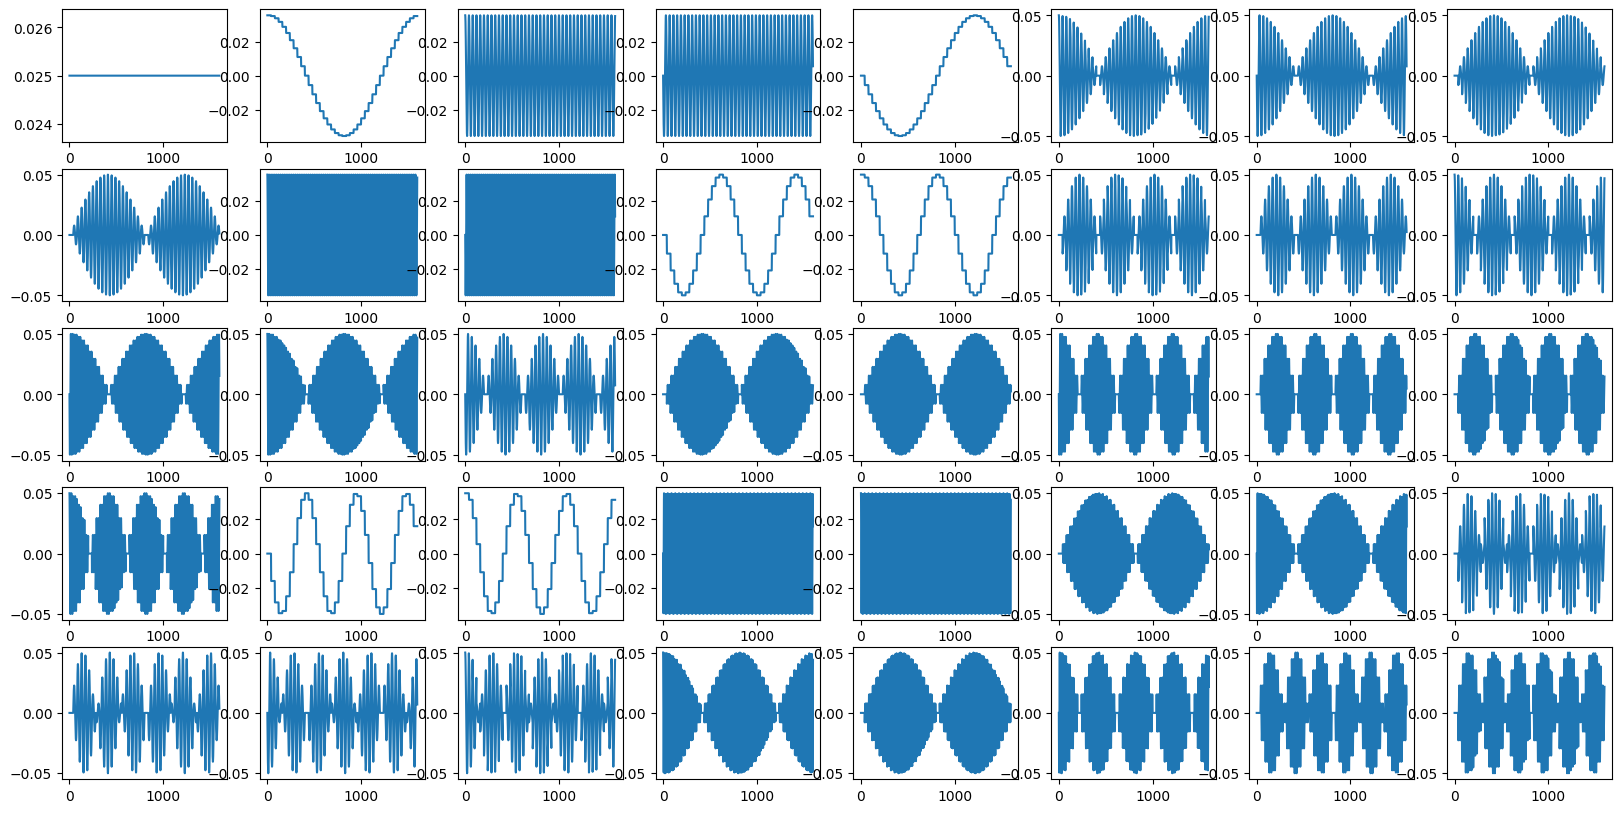

In [47]:
evals = jnp.diag(DRT.T @ Sigma @ DRT)
_ = plt.plot(evals)
DRT_ = DRT[:,np.argsort(evals)[::-1]]
_ = plt.plot(evals[np.argsort(evals)[::-1]])
fig, axs = plt.subplots(5, 8, figsize=(20, 10))
for i, ax in enumerate(axs.flatten()):
    # ax.imshow(DRT_[:,i].reshape(40, 40), cmap="gray")
    ax.plot(DRT_[:,i])

### Covariances

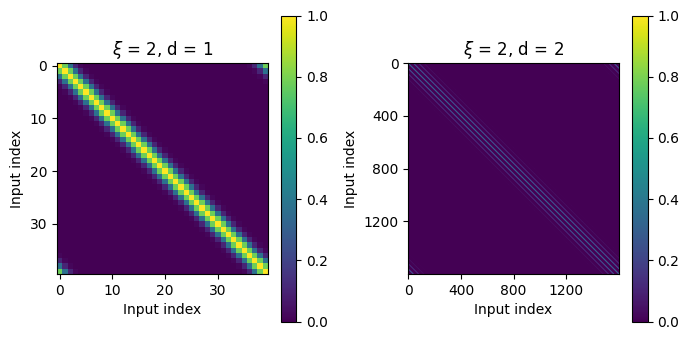

In [7]:
from localization.utils import build_gaussian_covariance
Sigma = build_gaussian_covariance(40, 2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3.5))
im = ax1.imshow(Sigma)
cbar = fig.colorbar(im, ax=ax1)
ax1.set_title(r"$\xi$ = 2, d = 1")
ax1.set_xlabel("Input index"); ax1.set_ylabel("Input index")
ax1.set_xticks(np.arange(0, 40, 10)); ax1.set_yticks(np.arange(0, 40, 10))
im = ax2.imshow(np.kron(Sigma, Sigma))
cbar = fig.colorbar(im, ax=ax2)
ax2.set_title(r'$\xi$ = 2, d = 2')
ax2.set_xlabel("Input index"); ax2.set_ylabel("Input index")
ax2.set_xticks(np.arange(0, 1600, 400)); ax2.set_yticks(np.arange(0, 1600, 400))
fig.tight_layout()